**1.) Importing the Modules**

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd     

**2.) Loading the dataset**

In [8]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")


*Converting into a numpy array*

In [9]:
data = np.array(data)
data_test = np.array(data_test)

r, c = data.shape

np.random.shuffle(data)
np.random.shuffle(data_test)

test_data = data[0:1000].T 
y_test = test_data[0]
X_test = test_data[1:c] / 255.0

train_data = data[1000:r].T
y_train = train_data[0]
X_train = train_data[1:c] / 255.0

**Creating Gradient Descent helper functions**

In [10]:
def init_params():
    w1 = np.random.randn(128, 784) * 0.01
    b1 = np.zeros((128, 1))
    w2 = np.random.randn(10, 128) * 0.01
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2


def ReLU(z):
    return np.maximum(0, z)
    
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)


def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2


def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y


def deriv_ReLU(z):
    return z > 0


def back_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = (1 / m) * dz2.dot(a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = (1 / m) * dz1.dot(x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2


def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

**Defining gradient Descent**

In [11]:
def get_predictions(a2):
    return np.argmax(a2, 0)


def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size


def gradient_descent(x, y, iterations, alpha):
    import sys
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        if i % 10 == 0:
            accuracy = get_accuracy(get_predictions(a2), y)
            sys.stdout.write(f"\rIteration {i:4d} | Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
            sys.stdout.flush()
            if i % 100 == 0:
                print()
    print()
    return w1, b1, w2, b2

In [12]:
w1, b1, w2, b2 = gradient_descent(X_train, y_train, 400, 0.05)

Iteration    0 | Accuracy: 0.0962 (9.62%)

Iteration  100 | Accuracy: 0.5679 (56.79%)

Iteration  200 | Accuracy: 0.7893 (78.93%)

Iteration  300 | Accuracy: 0.8447 (84.47%)

Iteration  390 | Accuracy: 0.8681 (86.81%)



In [13]:
def evaluate_model(x, y, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    accuracy = get_accuracy(predictions, y)
    return accuracy


print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

train_accuracy = evaluate_model(X_train, y_train, w1, b1, w2, b2)
test_accuracy = evaluate_model(X_test, y_test, w1, b1, w2, b2)

print(f"Training Accuracy:   {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy:       {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Overfitting Gap:     {(train_accuracy - test_accuracy):.4f} ({(train_accuracy - test_accuracy)*100:.2f}%)")

if train_accuracy - test_accuracy > 0.05:
    print("\n Model is overfitting (gap > 5%)")
elif train_accuracy - test_accuracy < -0.02:
    print("\nModel is underfitting (test > train)")
else:
    print("\n✓  Model generalizes well")
print("="*50)


MODEL EVALUATION
Training Accuracy:   0.8702 (87.02%)
Test Accuracy:       0.8830 (88.30%)
Overfitting Gap:     -0.0128 (-1.28%)

✓  Model generalizes well


In [14]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions


def test_predictions(index, w1, b1, w2, b2):
    current_img = X_train[:, index, None]
    prediction = make_predictions(current_img, w1, b1, w2, b2)
    label = y_train[index]
    print(f"Prediction: {prediction[0]} | Label: {label}")
    
    current_img = current_img.reshape((28, 28)) * 255 
    plt.gray()
    plt.imshow(current_img, interpolation="nearest")
    plt.show()


Prediction: 3 | Label: 3


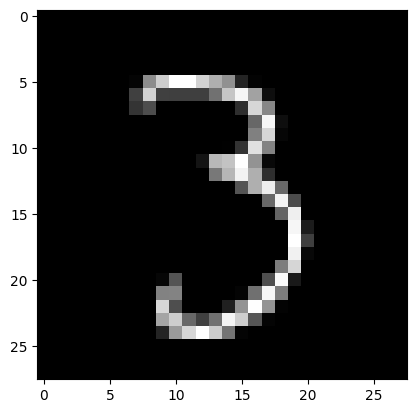

In [15]:
test_predictions(5, w1, b1, w2, b2)